# **HAVOK study** | data generation

Generate the test dataset used to characterize the Havok output prediction capabilities.

In [1]:
import rhavok
from rhavok.havok import havok

import numpy as np
import matplotlib.pyplot as plt

In [2]:
rhavok.__version__

'0.1.4'

In [3]:
data_path = './havok/'

<br>

#### Data import

We import the Lorenz attractor data. This ODE solution has been generated using the parameters
$\sigma = 10$, $\beta = 8/3$ and $\rho = 28$, with initial condition $x_0 = \left[ -8, 8, 27\right]$. The data is sampled with time step $dt=0.001$ using an ode45 solver.

In [4]:
# load data from Lorenz attractor
xxn, yyn, zzn = np.load('./attractors/Lorenz_ext3000.npy')
dt = 0.001
ttn = dt*np.arange(len(xxn))

<br><br>
### The usual Havok workflow

This time I generate the dataset using an higher rank ($r=21$), in order to have more tracks to test and characterize.

In [5]:
lorh = havok(dataset = xxn, dt = dt, timing = ttn, time_delay_size = 100, crop = int(2200/dt),
                 train_size = int(200/dt), rank = 21)

applying crop index 2200000


In [6]:
lorh.build_Hankel();

Built Hankel matrix with shape (100, 199901)


In [7]:
lorh.svd();

In [8]:
# set the sindy routines to default
lorh.set_sindy()

In [9]:
regr = lorh.regression()  # catch returns or use semicolons to suppress stdout

sparse regression Xi of shape (22, 20)


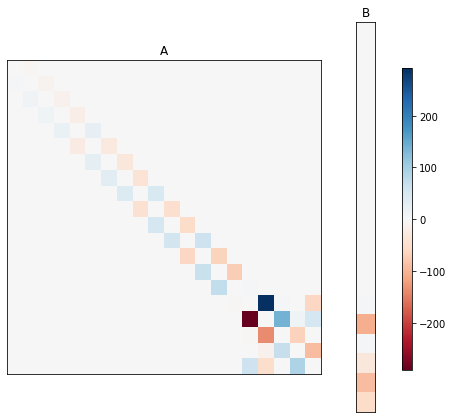

In [10]:
lorh.show_regression()  # just to check it out

### Retrieve the test dataset

In [11]:
v_test, t_test = lorh.compute_test_dataset()
v_test.shape

(2000000, 21)

In [12]:
x_test = lorh.get_test_timeseries()
x_test.shape

(2000000,)

### Save the test dataset

In [13]:
np.save(data_path + 'test_v', v_test)
np.save(data_path + 'test_t', t_test)
np.save(data_path + 'test_x', x_test)

In [14]:
# add other necessary files
np.save(data_path + 'svd_u', lorh.svd_u)
np.save(data_path + 'svd_sigma', lorh.svd_s)

***

**Workgroup**: Barone Francesco, Nagaro Gianmarco, Ninni Daniele, Valentini Lorenzo.

University of Padua, **Laboratory of Computational Physics**, module B.